## Plots of the results for the Eukaryote datasets

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import seaborn as sns
import statistics as s
from pathlib import Path

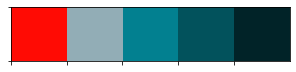

In [3]:
#[#0211f,#30242d,#685f66]
    # Create an array with the colors you want to use
colors = ["#FF0B04", "#92adb6",'#028090','#02525c','#012328']# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
sns.palplot(sns.color_palette(colors))

#### Concatenate all Eukaryote results files.
Euk_balt_results.csv  
Euk_all_results.csv    Euk_RNA_results.csv

In [140]:
results_files = ['Euk_Balt_results.csv ','Euk_all_results.csv ',  'Euk_RNA_results.csv ']
dfs = [] 
for filename in results_files:
    df1 = pd.read_csv('results' / Path(filename ))
    dfs.append(df1)
df = pd.concat(dfs)

In [5]:
df.head(20)


,label,label_tax,pool_label,pool_tax,Baltimore,N,Features,k,AUC,Acc,Spec,Sens,FDR,TP,TN,FP,FN
0,Metazoa,kingdom,Eukaryota,superkingdom,dsDNA,120,DNA,1,0.487,0.43,0.81,0.00,1.00,0,13,3,14
1,Metazoa,kingdom,Eukaryota,superkingdom,dsDNA,120,DNA,2,0.946,0.87,0.88,0.86,0.14,12,14,2,2
2,Metazoa,kingdom,Eukaryota,superkingdom,dsDNA,120,DNA,3,0.982,0.90,0.88,0.93,0.13,13,14,2,1
3,Metazoa,kingdom,Eukaryota,superkingdom,dsDNA,120,DNA,4,0.969,0.90,0.88,0.93,0.13,13,14,2,1
4,Metazoa,kingdom,Eukaryota,superkingdom,dsDNA,120,DNA,5,0.964,0.90,0.88,0.93,0.13,13,14,2,1
5,Metazoa,kingdom,Eukaryota,superkingdom,dsDNA,120,DNA,6,0.964,0.90,0.88,0.93,0.13,13,14,2,1
6,Metazoa,kingdom,Eukaryota,superkingdom,dsDNA,120,DNA,7,0.973,0.90,0.88,0.93,0.13,13,14,2,1
7,Metazoa,kingdom,Eukaryota,superkingdom,dsDNA,120,DNA,8,0.982,0.90,0.94,0.86,0.08,12,15,1,2
8,Metazoa,kingdom,Eukaryota,superkingdom,dsDNA,120,DNA,9,0.982,0.73,1.00,0.43,0.00,6,16,0,8
9,Metazoa,kingdom,Eukaryota,superkingdom,dsDNA,120,AA,1,0.973,0.90,0.94,0.86,0.08,12,15,1,2


In [141]:
df.rename(columns = {'label_tax':'tax'}, inplace=True)
#df.drop(columns= [ 'pool label', 'pool tax group'], inplace =True)

con = lambda row :f'{row["label"]}_{row["Baltimore"]}' 
df['Dataset'] = df.apply ( con, axis =1)
fs = lambda row: f'{row["Features"]}_{row["k"]}'
df['Feature set'] = df.apply(fs,axis = 1)

tax_order =['kingdom','phylum','class','order','family','genus','species']
df['tax'] = df['tax'].astype('category')
df['tax'].cat.set_categories(tax_order, inplace=True)
fs_order =['DNA_1','DNA_2','DNA_3','DNA_4','DNA_5','DNA_6','DNA_7','DNA_8','DNA_9','AA_1','AA_2','AA_3','AA_4','PC_1','PC_2','PC_3','PC_4','PC_5','PC_6','Domains_0']
df['Feature set'] = df['Feature set'].astype('category')
df['Feature set'].cat.set_categories(fs_order, inplace=True)
balt_order = ['all','RNA' ,'(+)ssRNA', '(-)ssRNA',  'dsRNA', 'dsDNA','ssDNA']
df['Baltimore'] = df['Baltimore'].astype('category')
df['Baltimore'].cat.set_categories(balt_order, inplace=True)
           

In [144]:
df.columns


Index(['label', 'tax', 'pool_label', 'pool_tax', 'Baltimore', 'N', 'Features',
       'k', 'AUC', 'Acc', 'Spec', 'Sens', 'FDR', 'TP', 'TN', 'FP', 'FN',
       'Dataset', 'Feature set'],
      dtype='object')

In [159]:
df2save = df[['label', 'tax', 'pool_label', 'pool_tax', 'Baltimore', 'N', 'Features',
       'k', 'AUC', 'Spec', 'Sens',]]
df2save.to_csv('csv4paper/Euk_results.csv',index=False)


df_datasets = df[df['k']==0][['label', 'tax', 'pool_label', 'pool_tax', 'Baltimore',\
                              'N']].sort_values(['tax'],ascending=True)
df_datasets.head()

df_datasets.to_csv('csv4paper/Euk_datasets.csv',index=False)

In [9]:
df[(df['Baltimore']=='dsRNA') & (df['Feature set']=='DNA_9')]

,label,tax,pool_label,pool_tax,Baltimore,N,Features,k,AUC,Acc,Spec,Sens,FDR,TP,TN,FP,FN,Dataset,Feature set
48,Metazoa,kingdom,Eukaryota,superkingdom,dsRNA,89,DNA,9,0.833,0.74,1.00,0.0,NaN,0,17,0,6,Metazoa_dsRNA,DNA_9
148,Viridiplantae,kingdom,Eukaryota,superkingdom,dsRNA,57,DNA,9,0.893,0.53,0.00,1.0,0.47,8,0,7,0,Viridiplantae_dsRNA,DNA_9
208,Fungi,kingdom,Eukaryota,superkingdom,dsRNA,142,DNA,9,0.783,0.69,0.15,1.0,0.32,23,2,11,0,Fungi_dsRNA,DNA_9
468,Streptophyta,phylum,Eukaryota,superkingdom,dsRNA,65,DNA,9,0.819,0.65,0.33,1.0,0.43,8,3,6,0,Streptophyta_dsRNA,DNA_9


In [142]:
df = df[df['N']>=56]
df = df[(df['Baltimore'].isin(balt_order))]
df.groupby(['Baltimore','tax']).count()

label  pool_label  pool_tax      N  Features      k    AUC  \
Baltimore tax                                                                   
all       kingdom    NaN         NaN       NaN    NaN       NaN    NaN    NaN   
          phylum    60.0        60.0      60.0   60.0      60.0   60.0   60.0   
          class    100.0       100.0     100.0  100.0     100.0  100.0  100.0   
          order    280.0       280.0     280.0  280.0     280.0  280.0  280.0   
          family   300.0       300.0     300.0  300.0     300.0  300.0  300.0   
          genus    280.0       280.0     280.0  280.0     280.0  280.0  280.0   
          species  240.0       240.0     240.0  240.0     240.0  240.0  240.0   
RNA       kingdom    NaN         NaN       NaN    NaN       NaN    NaN    NaN   
          phylum    40.0        40.0      40.0   40.0      40.0   40.0   40.0   
          class     80.0        80.0      80.0   80.0      80.0   80.0   80.0   
          order    220.0       220.0     220.0  220.0     220.0  220.0  220.0   
          family   280.0       280.0     280.0  280.0     280.0  280.0  280.0   
          genus    200.0       200.0     200.0  200.0     200.0  200.0  200.0   
          species  140.0       140.0     140.0  140.0     140.0  140.0  140.0   
(+)ssRNA  kingdom   60.0        60.0      60.0   60.0      60.0   60.0   60.0   
          phylum    60.0        60.0      60.0   60.0      60.0   60.0   60.0   
          class     40.0        40.0      40.0   40.0      40.0   40.0   40.0   
          order     80.0        80.0      80.0   80.0      80.0   80.0   80.0   
          family     NaN         NaN       NaN    NaN       NaN    NaN    NaN   
          genus      NaN         NaN       NaN    NaN       NaN    NaN    NaN   
          species    NaN         NaN       NaN    NaN       NaN    NaN    NaN   
(-)ssRNA  kingdom   40.0        40.0      40.0   40.0      40.0   40.0   40.0   
          phylum    40.0        40.0      40.0   40.0      40.0   40.0   40.0   
          class     60.0        60.0      60.0   60.0      60.0   60.0   60.0   
          order     60.0        60.0      60.0   60.0      60.0   60.0   60.0   
          family     NaN         NaN       NaN    NaN       NaN    NaN    NaN   
          genus      NaN         NaN       NaN    NaN       NaN    NaN    NaN   
          species    NaN         NaN       NaN    NaN       NaN    NaN    NaN   
dsRNA     kingdom   60.0        60.0      60.0   60.0      60.0   60.0   60.0   
          phylum    20.0        20.0      20.0   20.0      20.0   20.0   20.0   
          class      NaN         NaN       NaN    NaN       NaN    NaN    NaN   
          order      NaN         NaN       NaN    NaN       NaN    NaN    NaN   
          family     NaN         NaN       NaN    NaN       NaN    NaN    NaN   
          genus      NaN         NaN       NaN    NaN       NaN    NaN    NaN   
          species    NaN         NaN       NaN    NaN       NaN    NaN    NaN   
dsDNA     kingdom   20.0        20.0      20.0   20.0      20.0   20.0   20.0   
          phylum    40.0        40.0      40.0   40.0      40.0   40.0   40.0   
          class     40.0        40.0      40.0   40.0      40.0   40.0   40.0   
          order    100.0       100.0     100.0  100.0     100.0  100.0  100.0   
          family     NaN         NaN       NaN    NaN       NaN    NaN    NaN   
          genus      NaN         NaN       NaN    NaN       NaN    NaN    NaN   
          species    NaN         NaN       NaN    NaN       NaN    NaN    NaN   
ssDNA     kingdom   40.0        40.0      40.0   40.0      40.0   40.0   40.0   
          phylum    60.0        60.0      60.0   60.0      60.0   60.0   60.0   
          class     40.0        40.0      40.0   40.0      40.0   40.0   40.0   
          order     60.0        60.0      60.0   60.0      60.0   60.0   60.0   
          family     NaN         NaN       NaN    NaN       NaN    NaN    NaN   
          genus      NaN         NaN       NaN    

In [11]:
tax_ss = ['kingdom','phylum','class','order']

In [27]:
print (len(df))
df.replace(to_replace =("kingdom"), 
                 value ="phylum", inplace =True) 
df  =df[~((df['tax'].isin(['family','genus','species'])) & (df['Baltimore'].isin(['all'])))] 
print (len(df))
df.groupby(['Baltimore','tax']).count()

2320
2320


label  pool_label  pool_tax      N  Features      k    AUC  \
Baltimore tax                                                                   
(+)ssRNA  kingdom    NaN         NaN       NaN    NaN       NaN    NaN    NaN   
          phylum   120.0       120.0     120.0  120.0     120.0  120.0  120.0   
          class     40.0        40.0      40.0   40.0      40.0   40.0   40.0   
          order     80.0        80.0      80.0   80.0      80.0   80.0   80.0   
          family     NaN         NaN       NaN    NaN       NaN    NaN    NaN   
          genus      NaN         NaN       NaN    NaN       NaN    NaN    NaN   
          species    NaN         NaN       NaN    NaN       NaN    NaN    NaN   
(-)ssRNA  kingdom    NaN         NaN       NaN    NaN       NaN    NaN    NaN   
          phylum    80.0        80.0      80.0   80.0      80.0   80.0   80.0   
          class     60.0        60.0      60.0   60.0      60.0   60.0   60.0   
          order     60.0        60.0      60.0   60.0      60.0   60.0   60.0   
          family     NaN         NaN       NaN    NaN       NaN    NaN    NaN   
          genus      NaN         NaN       NaN    NaN       NaN    NaN    NaN   
          species    NaN         NaN       NaN    NaN       NaN    NaN    NaN   
RNA       kingdom    NaN         NaN       NaN    NaN       NaN    NaN    NaN   
          phylum    40.0        40.0      40.0   40.0      40.0   40.0   40.0   
          class     80.0        80.0      80.0   80.0      80.0   80.0   80.0   
          order    220.0       220.0     220.0  220.0     220.0  220.0  220.0   
          family   280.0       280.0     280.0  280.0     280.0  280.0  280.0   
          genus    200.0       200.0     200.0  200.0     200.0  200.0  200.0   
          species  140.0       140.0     140.0  140.0     140.0  140.0  140.0   
all       kingdom    NaN         NaN       NaN    NaN       NaN    NaN    NaN   
          phylum    60.0        60.0      60.0   60.0      60.0   60.0   60.0   
          class    100.0       100.0     100.0  100.0     100.0  100.0  100.0   
          order    280.0       280.0     280.0  280.0     280.0  280.0  280.0   
          family     NaN         NaN       NaN    NaN       NaN    NaN    NaN   
          genus      NaN         NaN       NaN    NaN       NaN    NaN    NaN   
          species    NaN         NaN       NaN    NaN       NaN    NaN    NaN   
dsDNA     kingdom    NaN         NaN       NaN    NaN       NaN    NaN    NaN   
          phylum    60.0        60.0      60.0   60.0      60.0   60.0   60.0   
          class     40.0        40.0      40.0   40.0      40.0   40.0   40.0   
          order    100.0       100.0     100.0  100.0     100.0  100.0  100.0   
          family     NaN         NaN       NaN    NaN       NaN    NaN    NaN   
          genus      NaN         NaN       NaN    NaN       NaN    NaN    NaN   
          species    NaN         NaN       NaN    NaN       NaN    NaN    NaN   
dsRNA     kingdom    NaN         NaN       NaN    NaN       NaN    NaN    NaN   
          phylum    80.0        80.0      80.0   80.0      80.0   80.0   80.0   
          class      NaN         NaN       NaN    NaN       NaN    NaN    NaN   
          order      NaN         NaN       NaN    NaN       NaN    NaN    NaN   
          family     NaN         NaN       NaN    NaN       NaN    NaN    NaN   
          genus      NaN         NaN       NaN    NaN       NaN    NaN    NaN   
          species    NaN         NaN       NaN    NaN       NaN    NaN    NaN   
ssDNA     kingdom    NaN         NaN       NaN    NaN       NaN    NaN    NaN   
          phylum   100.0       100.0     100.0  100.0     100.0  100.0  100.0   
          class     40.0        40.0      40.0   40.0      40.0   40.0   40.0   
          order     60.0        60.0      60.0   60.0      60.0   60.0   60.0   
          family     NaN         NaN       NaN    NaN       NaN    NaN    NaN   
          genus      NaN         NaN       NaN    

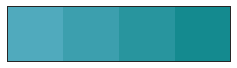

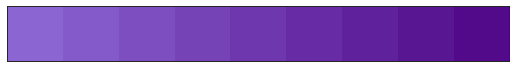

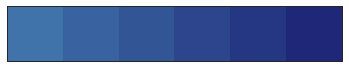

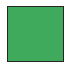

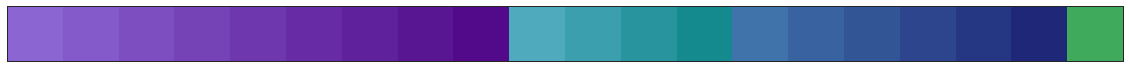

In [81]:
import seaborn as sns
import matplotlib.cm
import matplotlib.colors

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["c", "teal", ])
matplotlib.cm.register_cmap("tealcolormap", cmap)
teal_pal = sns.color_palette("tealcolormap", n_colors=4)

sns.palplot(teal_pal)

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["mediumpurple", "indigo", ])
matplotlib.cm.register_cmap("mycolormap", cmap)
purple_pal = sns.color_palette("mycolormap", n_colors=9)

sns.palplot(purple_pal)

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["steelblue", "midnightblue", ])
matplotlib.cm.register_cmap("mycolormap", cmap)
blue_pal = sns.color_palette("mycolormap", n_colors=6)
sns.palplot(blue_pal)
dom_cols =  sns.color_palette('YlGn',7)[4:5]
sns.palplot(dom_cols)


sns.palplot(all_cols)

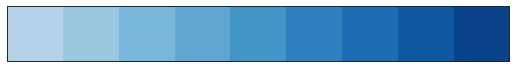

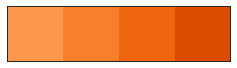

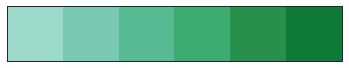

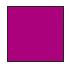

In [83]:
DNA_cols =  sns.color_palette('Blues',12)[3:12]
sns.palplot(DNA_cols)

AA_cols =  sns.color_palette('Oranges',10)[4:8]
sns.palplot(AA_cols)

PC_cols =  sns.color_palette('BuGn',10)[3:9]
sns.palplot(PC_cols)

dom_cols =  sns.color_palette('RdPu',7)[5:6]
sns.palplot(dom_cols)

all_cols =(DNA_cols + AA_cols + PC_cols + dom_cols)

<Figure size 950.4x1440 with 0 Axes>

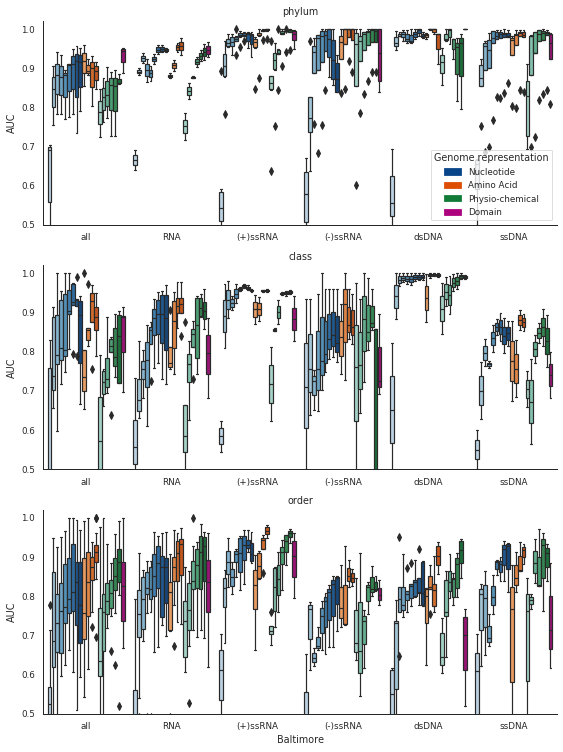

In [102]:
import matplotlib.patches as mpatches
balt_ss = ['all','RNA' ,'(+)ssRNA', '(-)ssRNA',   'dsDNA','ssDNA']
tax_ss = ['phylum','class','order']
subset =df[(df['Baltimore'].isin(balt_ss))]
subset = subset[(subset['tax'].isin(tax_ss))]


#sns.set(font_scale=1.5)
sns.set_style("white")
sns.set_context ('paper')
fig = plt.figure(figsize=(13.2,20))
g = sns.catplot(data=subset , col= "tax",col_wrap=1, height=8,aspect =2, 
                  margin_titles=True, col_order=tax_ss, legend_out = True,
                    x = 'Baltimore',y = 'AUC', hue = 'Feature set',
                    kind = 'box',
                    hue_order = fs_order,
                    palette=all_cols,
                    order= balt_ss,
                    dodge = True,
                    sharex = False,
                    legend = False,
                     width =.9 , #linewidth =1
               )
rep_legend = [mpatches.Patch(color=all_cols[8], label= 'Nucleotide'),
              mpatches.Patch(color=all_cols[12], label= 'Amino Acid'),
                mpatches.Patch(color=all_cols[-2], label= 'Physio-chemical'),
                mpatches.Patch(color=all_cols[-1], label= 'Domain')
             ]
g.axes[0].legend (handles= rep_legend, title = 'Genome representation',loc='lower right', facecolor="white")                  
g.set_titles('{col_name}' ,fontsize= 120)
g.set(ylim = (0.5,1.02) ) 
plt.subplots_adjust(hspace = 0.2)
plt.gcf().set_size_inches(7.5, 10)

In [139]:
g.savefig('Figures/boxplots_Euk.svg', bbox_inches="tight")


In [138]:
g.savefig('Figures/boxplots_euk.png', dpi=300)

## Heat Map

In [115]:
tax_order =['kingdom','phylum','class','order','family','genus','species']
df['tax'] = df['tax'].astype('category')
df['tax'].cat.set_categories(tax_order, inplace=True)
concat_ds = lambda row: f'{row["Dataset"]} ({row["N"])} '
df['ds']= df.apply(concat_ds , axis=1)

df1 = df.sort_values(['tax','label'])
unique = df1.ds.unique()

dfp = df1.pivot_table(index='ds',columns='Feature set', values ='AUC').reindex(unique)


In [116]:
dfp.head()

Feature set,DNA_1,DNA_2,DNA_3,DNA_4,DNA_5,DNA_6,DNA_7,DNA_8,DNA_9,AA_1,AA_2,AA_3,AA_4,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,Domains
ds,,,,,,,,,,,,,,,,,,,,
Arthropoda_dsDNA_249,0.556,0.964,0.993,0.988,0.974,0.970,0.986,0.999,0.976,0.989,1.000,0.986,0.988,0.915,0.973,0.997,0.975,0.976,0.988,1.000
Arthropoda_ssDNA_247,0.500,0.751,0.685,0.698,0.767,0.826,0.824,0.835,0.861,0.804,0.798,0.844,0.840,0.726,0.698,0.724,0.819,0.834,0.844,0.807
Arthropoda_(+)ssRNA_437,0.428,0.782,0.954,0.934,0.933,0.954,0.969,0.965,0.954,0.847,0.875,0.971,0.974,0.638,0.752,0.844,0.904,0.941,0.946,0.949
Arthropoda_all_883,0.704,0.846,0.882,0.878,0.882,0.907,0.911,0.918,0.915,0.854,0.893,0.899,0.916,0.725,0.763,0.772,0.857,0.896,0.884,0.943
Arthropoda_RNA_816,0.690,0.882,0.938,0.924,0.904,0.935,0.958,0.958,0.951,0.874,0.921,0.965,0.977,0.786,0.862,0.874,0.928,0.945,0.961,0.966


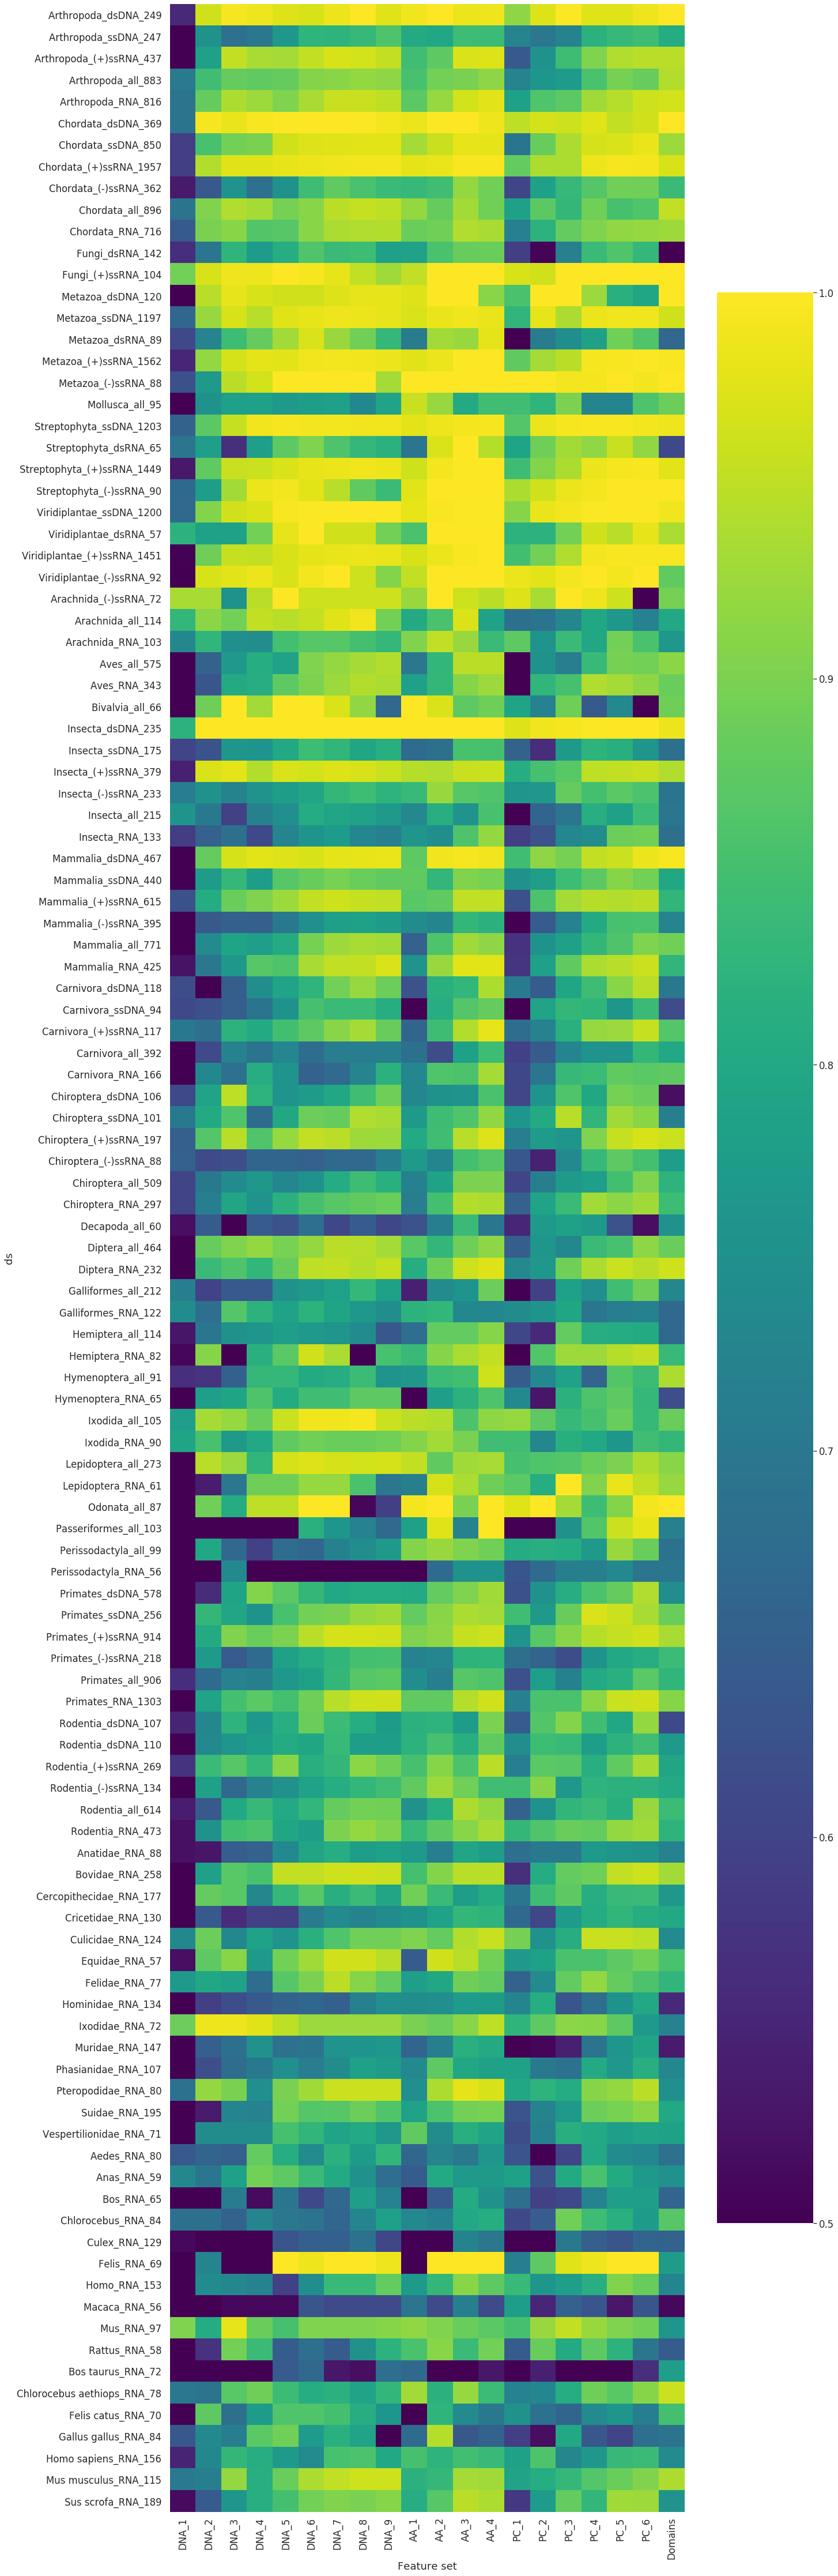

In [117]:
sns.set(font_scale=1.5)
f, ax = plt.subplots(figsize=(20, 80))
sns.heatmap(dfp,cmap = 'viridis', vmin = 0.5,   ax=ax)

In [ ]:
f.savefig('euk_hm.png', dpi=400)

In [106]:

fs_order =['DNA_1','DNA_2','DNA_3','DNA_4','DNA_5','DNA_6','DNA_7','DNA_8','DNA_9','AA_1','AA_2','AA_3','AA_4','PC_1','PC_2','PC_3','PC_4','PC_5','PC_6','Domains']
df['Feature set'] = df['Feature set'].astype('category')
df['Feature set'].cat.set_categories(fs_order, inplace=True)

In [118]:
tax_order

['kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species']

In [119]:

tax_order.reverse()
baltdf = df1[df1['Feature set']=='DNA_1'][['tax','Baltimore']]
balt_to_int = {j:i for i,j in enumerate(balt_order)} 
tax_to_int  = {j: i for i,j in enumerate(tax_order)} 
baltdf.Baltimore.replace(balt_to_int, inplace=True)
baltdf.tax.replace(tax_to_int, inplace=True)
baltdf.tax.astype('int32').dtypes

baltdf.tail()

,tax,Baltimore
240,0,1
620,0,1
320,0,1
480,0,1
80,0,1


In [120]:
print(baltdf.tax.unique())
type(list(balt_to_int.values())[0])

[5 4 3 2 1 0]


int

11


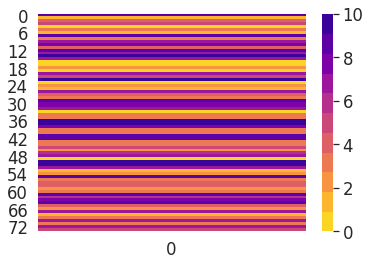

In [112]:
# random list of ints
import random
# testlist = [random.randint(0, 10) for _ in range(74)]
# test_uniq = list(range(10,0,-1))
cmapx =sns.color_palette("plasma_r", len(test_uniq)+1)
print(len(cmapx))
sns.heatmap(pd.DataFrame(testlist), cmap=cmapx, cbar = True)

### trying to get tax list and colourbar the same way up

{'class': 4,
 'family': 2,
 'genus': 1,
 'kingdom': 6,
 'order': 3,
 'phylum': 5,
 'species': 0}

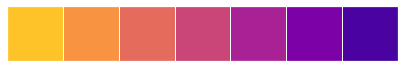

In [135]:
n = len(tax_order)  
# discrete colormap (n samples from a given cmap)
cmap3 = sns.color_palette("plasma_r", n)
sns.palplot(cmap3)
tax_to_int

In [122]:
lab = [(l.split('_')[0], l.split('_')[2]) for l in dfp.index ]
labels = [f'{a} ({b})' for(a,b) in lab]


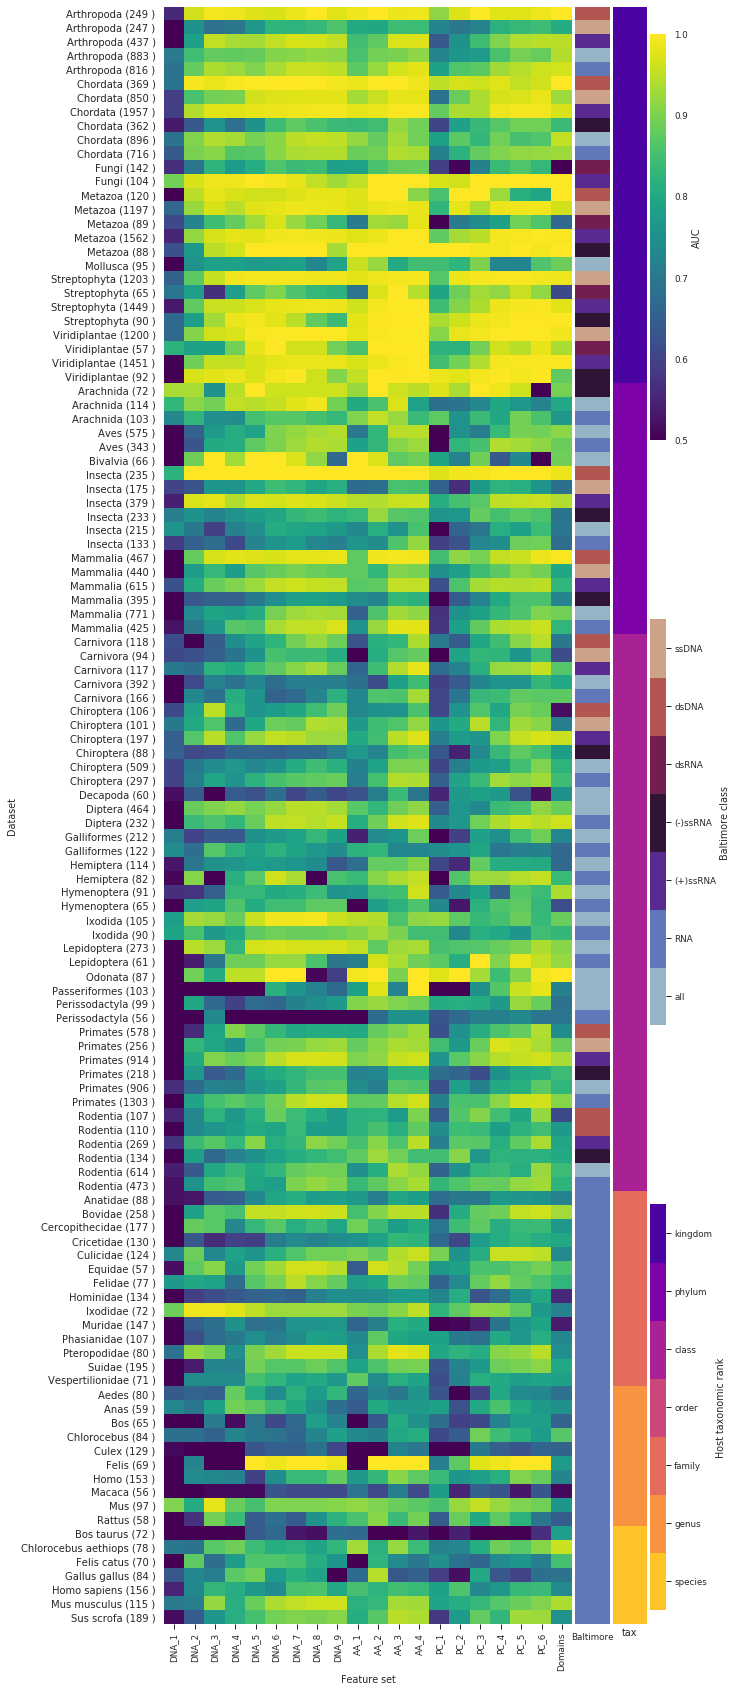

In [172]:
sns.set_context ('paper')
fig = plt.figure(figsize=(10,30))

# lab = [(l.split('_')[0], l.split('_')[2]) for l in dfp.index ]
# labels = [f'{a} {b}' for(a,b) in lab]

ax1 = plt.subplot2grid((120,30), (0,0), colspan=22, rowspan=119) # heatmap
#ax1.set_title ('Heatmap of Eukatyote Classifiers',  fontname="Arial", fontsize=18)
ax2 = plt.subplot2grid((120,30), (0,22), colspan=2, rowspan=119) # Baltimore
ax3 = plt.subplot2grid((120,30), (0,24), colspan=2, rowspan=119) #tax
ax4 = plt.subplot2grid((120,30), (2,26), colspan=1, rowspan=30) # co;orbar1
ax5 = plt.subplot2grid((120,30), (45,26), colspan=1, rowspan=30)
ax6 = plt.subplot2grid((120,30), (88,26), colspan=1, rowspan=30)


#sns.set(font_scale=1.0)

h1 = sns.heatmap(dfp, ax=ax1,vmin = 0.5,cbar = True, cbar_ax = ax4,  cmap="viridis",cbar_kws={'label': 'AUC'})


#Baltimore group

n = len(balt_to_int)
cmap2 = sns.color_palette("twilight", n) 
h2 =sns.heatmap(pd.DataFrame(baltdf.Baltimore), ax = ax2, cmap=cmap2, cbar_ax = ax5)
colorbar = h2.collections[0].colorbar
r = colorbar.vmax - colorbar.vmin 
colorbar.set_label('Baltimore class')
colorbar.set_ticks([colorbar.vmin + (0.5 * r / (n)) + ( r * i / n) for i in range(n)])
colorbar.set_ticklabels(list(balt_to_int.keys())) 

# color bar for tax label

n = len(tax_order)  
# discrete colormap (n samples from a given cmap)
cmap3 = sns.color_palette("plasma_r", n)

h3 = sns.heatmap(pd.DataFrame(list(baltdf.tax)), ax=ax3 ,cmap=cmap3, cbar_ax = ax6) 
# modify colorbar: 
colorbar = h3.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_label('Host taxonomic rank')
colorbar.set_ticks([colorbar.vmin + (0.5 * r / (n)) + ( r * i / n) for i in range(n)])
colorbar.set_ticklabels(list(tax_to_int.keys())) 
ax1.xaxis.tick_bottom()
ax1.set_xticklabels(dfp.columns,rotation=90)

ax1.set_yticklabels(labels,fontdict={'size': 10,})
ax1.set_ylabel('Dataset')
ax1.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    right=False,      # ticks along the bottom edge are off
     left=False,         # ticks along the top edge are off
    labelleft=True
    
    )

ax2.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    right=False,      # ticks along the bottom edge are off
     left=False,         # ticks along the top edge are off
    labelleft=False
    )

ax3.set_xlabel('tax')
ax3.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    right=False,      # ticks along the bottom edge are off
     left=False,         # ticks along the top edge are off
    labelleft=False
    )
ax3.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    top=False,      # ticks along the bottom edge are off
     bottom=False,         # ticks along the top edge are off
    labelbottom=False
    )
ax4.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    right=False,      # ticks along the bottom edge are off
     left=False,         # ticks along the top edge are off
    labelleft=False
    )


In [173]:
fig.savefig('Figures/Figure_3.svg',  bbox_inches="tight")

In [174]:
#plt.gcf().set_size_inches(7.5, 10)
fig.savefig('Figures/Figure_3.png',  bbox_inches="tight", dpi=300)

In [21]:
from PIL import Image
from io import BytesIO

png1 = BytesIO()
fig.savefig(png1, format='png')

png2 = Image.open(png1)

# (3) save as TIFF
png2.save('Euk_HM.tiff')
png1.close()

fig.savefig('Euk_hm.png',  bbox_inches="tight", dpi=300)